In [1]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path
import seaborn as sns

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

from lib_event import EVENTS
from lib_data import DATA_IO

import utils_plotting_accelerometer

In [2]:
PATH_CURR  = os.path.abspath(os.curdir)    # current code
PATH       = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated
SUB        = '016'

In [3]:
# 1. Load event history of patient
df_events_016 = pd.read_csv(DATA_IO.path_events_dataframe + "SUB_"+ SUB +"_EVENTS_ACC.csv")

In [4]:
def get_cdrs_value(row):
    if row['laterality'] == 'right':
        return row['CDRS_right_hand']
    elif row['laterality'] == 'left':
        return row['CDRS_left_hand']
    elif row['laterality'] == 'bilateral':
        return row['CDRS_total_hands']
    else:
        return None

# Apply the function to each row and create a new column
df_events_016['dyskinesia_score'] = df_events_016.apply(get_cdrs_value, axis=1)

In [5]:
import seaborn as sns

In [6]:
color_palette = [utils_plotting_accelerometer.colors["involuntary_movement"]['LID_moderate'],
                                    utils_plotting_accelerometer.colors["tapping"]['LID_moderate']]

In [7]:
def count_plot(data, feat_x, hue, axis, color_palette):
    axis = sns.countplot(data, x=feat_x, hue=hue, orient="h", palette=color_palette, ax=axis)
    axis.set_xlabel("")
    axis.set_title(feat_x, fontsize=utils_plotting_accelerometer.LABEL_SIZE, weight="bold")
    axis.legend(loc="lower center", fontsize=utils_plotting_accelerometer.LABEL_SIZE, 
                bbox_to_anchor=(0.5, -0.5), title=None, ncol=2, frameon=False)
    return axis

def boxplot(data, feat_x, feat_y, hue, axis, color_palette, ylabel):
    axis = sns.boxplot(data=data, x=feat_x, y=feat_y, hue=hue, showfliers=False, ax=axis)
    axis.set_xlabel("")
    axis.set_ylabel(ylabel, fontsize=utils_plotting_accelerometer.LABEL_SIZE)
    axis.legend(loc="lower center", fontsize=utils_plotting_accelerometer.LABEL_SIZE, 
                bbox_to_anchor=(0.5, -0.6), title=None, ncol=2, frameon=False)
    return axis

C:\Users\a.kaymak\AppData\Local\Temp\ipykernel_15800\1786288565.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((75, 50), (0, 0), colspan=10, rowspan=10)


<Figure size 640x480 with 0 Axes>

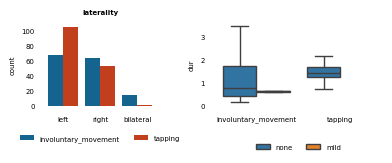

In [8]:
plt = utils_plotting_accelerometer.get_figure_template()

ax1 = plt.subplot2grid((75, 50), (0, 0), colspan=10, rowspan=10)
ax2 = plt.subplot2grid((75, 50), (0, 15) , colspan=15, rowspan=10)

ax1 = count_plot(df_events_016, feat_x="laterality", hue="event_category", axis=ax1, color_palette=color_palette)
ax2 = boxplot(df_events_016, feat_x="event_category", feat_y="duration", hue="dyskinesia_score", axis=ax2, 
              color_palette=color_palette, ylabel="dur")


utils_plotting_accelerometer.set_axis(ax1)
utils_plotting_accelerometer.set_axis(ax2)